In [4]:
import matplotlib
import matplotlib.pyplot as plt
import requests
import spotipy
import spotipy.util as util
import json
import numpy as np

CLIENT_ID = '06fdc33f688440e6bff40f6eb930f21c'
CLIENT_SECRET = 'f83c328423054a73a3daa9ae9045e538'
REDIRECT_URI = 'http://localhost/'
SPOTIFY_SCOPE = 'user-library-read playlist-modify-public'
username = 'james.hoke.peacock'

In [51]:
token = util.prompt_for_user_token(username, SPOTIFY_SCOPE, client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI)
sp = spotipy.Spotify(auth=token)
print token

BQD9GpbixWTZ5ytVTPrQ9f3qxN7NZldhaJXxGBekVb-Gfpl_qYmlqvZDefCtEpdbQ7rZ_miBpcYvwkLXgdULrVnzukahvgMqpuNjmEIKFQz2mShZW4VJlQgFSD5T1NevFiheU7-215E-P8V53fvLI7fpxRNa72ybUKQWyAD1Jo4XQqyAx_Iz1GyJM2uquWMXyDXGenY


In [36]:
# Define a function for a bar plot
def barplot(x_data, y_data, error_data, x_label, y_label, title):

    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, rotation='horizontal')
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.xticks(rotation=45)


In [10]:
def mean_and_std(mat):
    # Assumes summing vertically. Horizontal dimension preserved
    npmat = np.array(mat)
    mean = np.mean(npmat, axis=0)
    std = np.std(npmat, axis=0)
    return mean, std
    

In [66]:
def fetch_and_viz(song_uris, display_songs=False):
    track_features = sp.audio_features(song_uris)
    features = [u'energy', u'liveness', u'tempo', u'speechiness', u'acousticness', u'instrumentalness', u'danceability', u'key', u'valence'] # loudness excluded for now
    song_data = []
    print "Songs Featured"
    for track in track_features:
        if display_songs:
            track_full = sp.track(track['uri'])
            print track_full['name']
        vals = [track[f] for f in features]
        vals[2] = float((vals[2] - 24)) / 204
        vals[7] /= float(13)
        song_data.append(vals)
    mean, std_dev = mean_and_std(song_data)
    barplot(x_data = features
        , y_data = mean
        , error_data = std_dev
        , x_label = 'Features'
        , y_label = 'Values'
        , title = 'Playlist Analysis')
    

In [67]:
def vizualize_playlist(playlist_uri, display_songs=False):
    plid = playlist_uri.split(":")[-1]
    track_results = sp._get("playlists/%s/tracks" % (plid), limit=100, offset=0,market='US')
    all_song_uris = [track[u'track'][u'uri'] for track in track_results['items']]
    fetch_and_viz(all_song_uris, display_songs)

Sit Next to Me
4ware


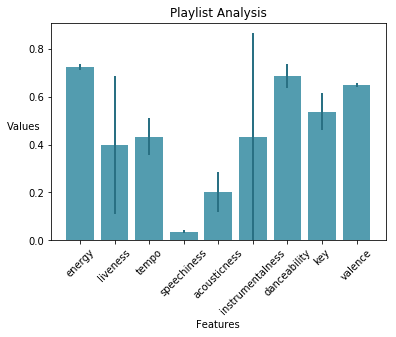

In [44]:
fetch_and_viz(['spotify:track:4BdGO1CaObRD4La9l5Zanz','spotify:track:1ROBixGgXrYlcCcrBfxAoy'])

In [69]:
groove_theory_uri='spotify:user:spotify:playlist:37i9dQZF1DX1tW4VlEfDSS'
rap_caviar_uri = 'spotify:user:spotify:playlist:37i9dQZF1DX0XUsuxWHRQd'
pollen_uri = 'spotify:user:spotify:playlist:37i9dQZF1DWWBHeXOYZf74'
chill_n_bassy_uri = 'spotify:user:james.hoke.peacock:playlist:0Xl3RIy0jPlv3axAB1pMoR'
house_home_uri = 'spotify:user:heathrfeathr:playlist:3xwAMNQ6hHChEkG8469Iy1'
skrt_uri = 'spotify:user:miragefx:playlist:0JQJjjtY4GRaYgX1c8Qeo2'

Songs Featured


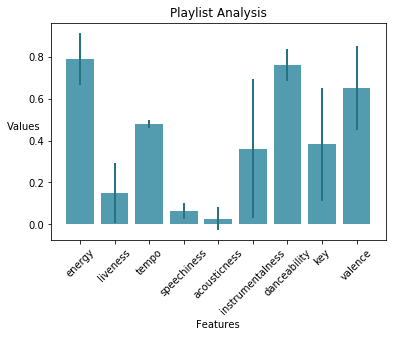

In [70]:
vizualize_playlist(groove_theory_uri, display_songs=False)

In [64]:
## Danceability, tempo & speechiness have narrowest std dev. Energy is next 
# instrumentalness,  liveness and valence have wide std dev for this playlist

Songs Featured


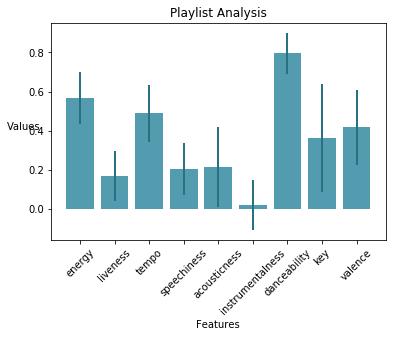

In [71]:
vizualize_playlist(rap_caviar_uri)

Songs Featured


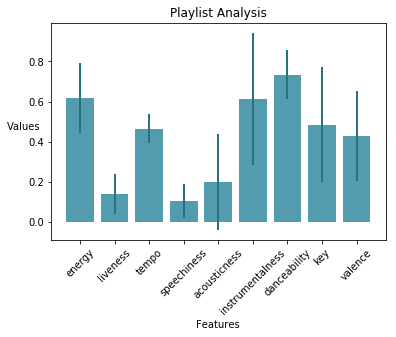

In [72]:
vizualize_playlist(house_home_uri)

Songs Featured


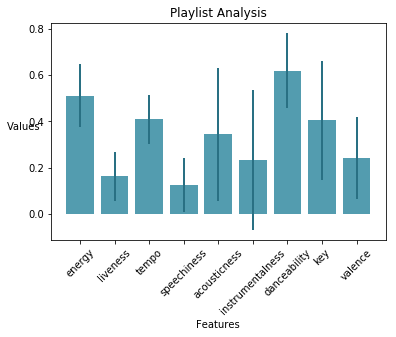

In [73]:
vizualize_playlist(chill_n_bassy_uri)

Songs Featured


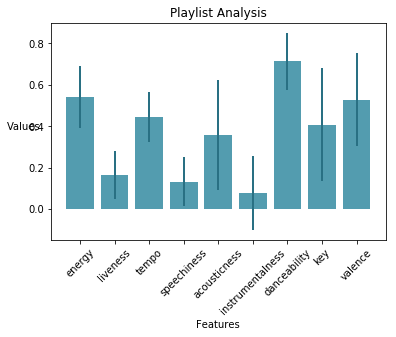

In [74]:
vizualize_playlist(pollen_uri)

In [75]:
#CONCLUSION: NO Playlist is consistent